# Diccionario de variables

- id_colaborador - Identificador único del colaborador.
- id_ultimo_jefe - Identificador único del que corresponde al jefe o responsable.
- seniority - 1: Para quienes no tienen personal a su cargo, 2: Para los que sí tienen.
- modalidad_trabajo - Es la modalidad de trabajo especificada en el contrato del colaborador.
- distancia_oficina - Es la distancia en kilómetros que debe recorrer el colaborador desde su hogar para llegar a su sede.
- dias_baja_salud - Es el número de días de bajas justificadas por enfermedad desde que inició labores.
- genero - Especifica si es Hombre o Mujer
- canal_reclutamiento - Indica el medio por el cual se dio el proceso de postulación.
- permanencia_promedio - Es el tiempo promedio en años que el colaborador duró en sus experiencias laborales anteriores.
- fecha_nacimiento - Es la fecha de nacimiento en formato dd/mm/aaaa.
- salario - Es el monto correspondiente a la remuneración mensual percibida.
- psi_score - Es el puntaje obtenido en el test psicométrico durante el proceso de selección.
- fecha_incorporación - Se refiere al día en el que el colaborador comienza oficialmente a trabajar en la empresa.
- estado_civil - Se refiere a la situación legal en términos de relaciones personales formales reconocidas por la ley.
- performance_score - Es el puntaje obtenido por el colaborador en su última evaluación trimestral si tuviera.
- abandono_6meses - Es igual a "0" si continua laborando ó "1" si ya dejó la compañía en sus primeros 6 meses

# Carga de Datos

In [2]:
# Librerias
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import missingno

In [3]:
# Tamano de las graficas
sns.set(
    rc={
        'figure.figsize':(9, 9)
    }
)

In [4]:
# Estilo de graficas
sns.set_theme(style="whitegrid")

In [5]:
# carga de datos
df = pd.read_csv('../Datos_Hackaton/test_data.csv', sep=';')
df.head()

,id_colaborador,id_ultimo_jefe,seniority,modalidad_trabajo,distancia_oficina,dias_baja_salud,genero,canal_reclutamiento,permanencia_promedio,fecha_nacimiento,salario,performance_score,psi_score,fecha_incorporacion,estado_civil
0,100486,102115.0,1,Híbrida,0.795,2,Hombre,Ferias & Networking,2,19/01/1997,181654,99,81,24/07/2021,Soltero
1,103752,102074.0,1,Híbrida,1.715,1,Mujer,Ferias & Networking,1,20/08/1999,140986,97,75,27/01/2018,Soltero
2,103937,102150.0,1,Híbrida,2.375,1,Hombre,Portal Web,6,29/10/1984,406690,96,69,24/04/2022,Soltero
3,101744,102172.0,1,Híbrida,2.185,3,Hombre,Linkedin,3,9/11/1992,249107,95,73,23/05/2023,Casado
4,101037,102060.0,1,Híbrida,4.660,3,Hombre,Referidos,10,14/07/1969,698318,95,81,20/06/2015,Viudo


In [6]:
# tamano del dataset
df.shape

(2020, 15)

# Tratamiento Valores Faltantes

In [7]:
# variables con sus respectivos valores faltantes
df.isnull().sum()

id_colaborador           0
id_ultimo_jefe          83
seniority                0
modalidad_trabajo        0
distancia_oficina        0
dias_baja_salud          0
genero                   0
canal_reclutamiento      0
permanencia_promedio     0
fecha_nacimiento         0
salario                  0
performance_score        0
psi_score                0
fecha_incorporacion      0
estado_civil             0
dtype: int64

Valores faltantes en las variables id_ultimo_jefe. Hay que revisar la relacion de los missing de esta variable con las demas

In [8]:
# Codigo para correr las funciones de utils.ipynb
%run utils.ipynb

In [9]:
# Cantidad de valores completos
v_complet = df.missing.number_complete()
v_complet

30217

In [10]:
# Cantidad de valores faltantes
v_missing = df.missing.number_missing()
v_missing

83

In [11]:
# Porcentaje de valores faltantes en el dataframe
pct_v = (v_missing/v_complet)*100
pct_v

0.27467981599761726

El 0.27% de los datos son valores faltantes, una cantidad bastante baja por lo que podria eliminarse los registros de manera directa.Sin embargo, para la competencia se requiere una imputacion de valores antes que una eliminacion. Apliquemos un EDA sobre los missing

In [12]:
# Tabla de registros con valores faltantes y completos
df.missing.missing_case_table()

,n_missing_in_case,n_cases,pct_case
0,0,1937,95.891089
1,1,83,4.108911


In [13]:
# Analisis de intervalos consecutivos de variables donde se encuentran las missing
df.missing.missing_variable_run(variable='id_ultimo_jefe')

,run_length,is_na
0,105,complete
1,1,missing
2,96,complete
3,1,missing
4,120,complete
...,...,...
138,2,complete
139,4,missing
140,1,complete
141,1,missing


La tabla nos indica que los valores faltantes de **id_ultimo_jefe** estan dispersos, no siguen un patron.

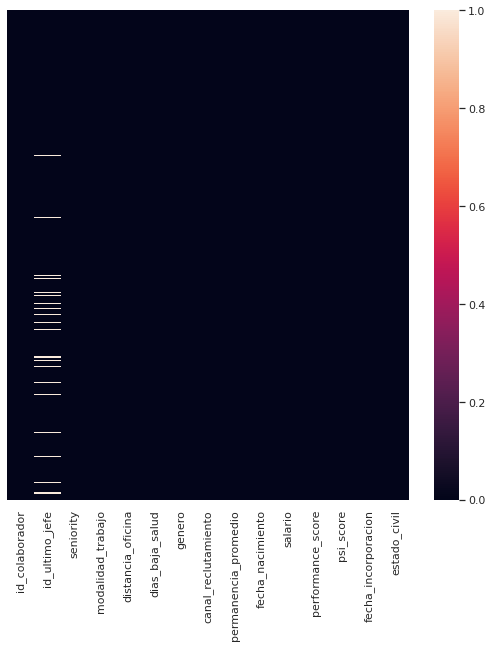

In [14]:
# heatmap de valores faltantes
sns.heatmap(df.isnull(), yticklabels=False);

Vemos que los valores faltantes de **id_ultimo_jefe** se encuentran dispersos. Veamos las relaciones de id_ultimo_viaje con las demas variables para asi aplicar un proceso de imputacion

## Analisis de Valores Faltante en id_ultimo_jefe para variables categoricas

Vamos a analizar los registros con valores faltantes para ver si estos tienen que ver con alguna de las demas variables

In [15]:
missing_var = df[df['id_ultimo_jefe'].isna()]
missing_var

,id_colaborador,id_ultimo_jefe,seniority,modalidad_trabajo,distancia_oficina,dias_baja_salud,genero,canal_reclutamiento,permanencia_promedio,fecha_nacimiento,salario,performance_score,psi_score,fecha_incorporacion,estado_civil
105,102121,NaN,2,Híbrida,1.63,2,Hombre,Portal Web,4,18/05/1967,1616000,90,77,28/02/2012,Divorciado
202,102133,NaN,2,Híbrida,2.61,2,Hombre,Linkedin,4,30/05/1982,1255430,98,65,27/02/2018,Soltero
323,102104,NaN,2,Híbrida,6.72,1,Mujer,Portal Web,6,14/07/1992,743000,91,61,1/04/2023,Soltero
419,102051,NaN,2,Híbrida,1.39,1,Hombre,Portal Web,11,19/02/1973,1616000,83,76,14/11/2019,Casado
464,102111,NaN,2,Híbrida,2.04,1,Mujer,Referidos,15,27/04/1971,1616000,94,67,15/05/2021,Soltero
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1990,102084,NaN,2,Presencial,2.62,3,Mujer,Portal Web,14,15/11/1972,1616000,89,76,22/07/2023,Divorciado
1991,102071,NaN,2,Presencial,0.87,1,Hombre,Portal Web,11,13/03/1972,1616000,85,72,11/11/2023,Viudo
1992,102045,NaN,2,Presencial,3.19,3,Hombre,Portal Web,11,21/03/1970,1616000,97,65,26/09/2023,Casado
1993,102066,NaN,2,Presencial,3.62,3,Hombre,Referidos,5,27/02/1968,1616000,97,84,6/12/2023,Casado


### Distribucion de Genero


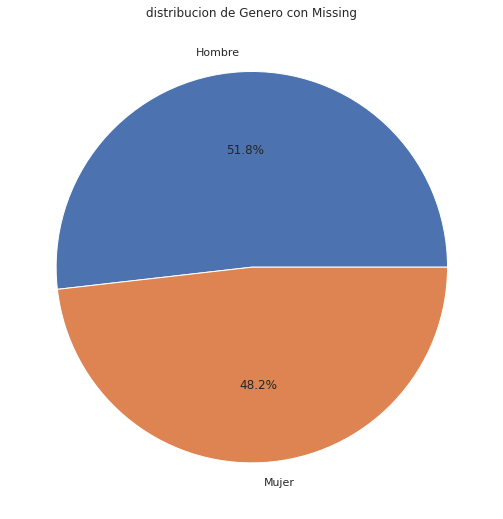

In [16]:
# Conteo de genero
genero_count = missing_var['genero'].value_counts()

# grafico
plt.pie(genero_count, labels=genero_count.index, autopct='%1.1f%%')
plt.title('distribucion de Genero con Missing');


### Distribucion Seniority

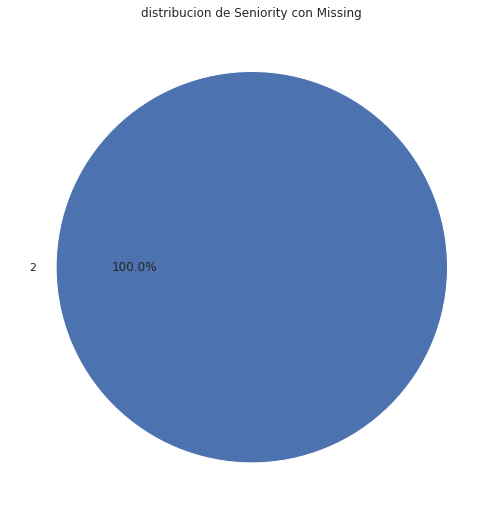

In [17]:
# Conteo seniority
seniority_count = missing_var['seniority'].value_counts()

# grafico
plt.pie(seniority_count, labels=seniority_count.index, autopct='%1.1f%%')
plt.title('distribucion de Seniority con Missing');

El grafico nos indica que en la mayoria de los registros con missing, los empleados tienen personal a su cargo (2)

### Distribucion canal

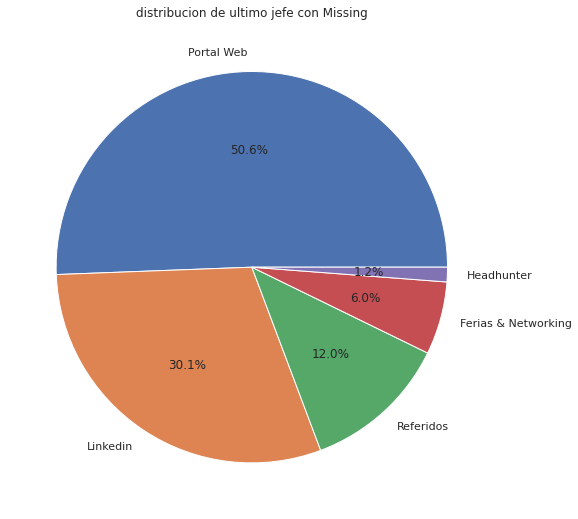

In [18]:
# Conteo seniority
canal_count = missing_var['canal_reclutamiento'].value_counts()

# grafico
plt.pie(canal_count, labels=canal_count.index, autopct='%1.1f%%')
plt.title('distribucion de ultimo jefe con Missing');

### Distribucion Modalidad Trabajo

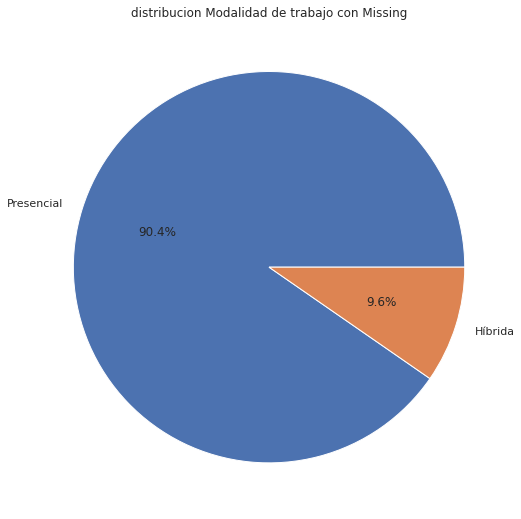

In [19]:
# Conteo seniority
trabajoM_count = missing_var['modalidad_trabajo'].value_counts()

# grafico
plt.pie(trabajoM_count, labels=trabajoM_count.index, autopct='%1.1f%%')
plt.title('distribucion Modalidad de trabajo con Missing');

Hay una gran cantidad de empleados en modalidad presencial con missing en id_ultimo_jefe

### distribucion Abandono 6 meses

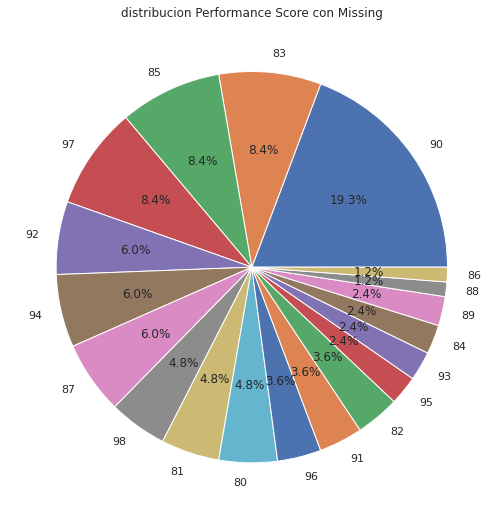

In [20]:
# Conteo seniority
abandono_count = missing_var['performance_score'].value_counts()

# grafico
plt.pie(abandono_count, labels=abandono_count.index, autopct='%1.1f%%')
plt.title('distribucion Performance Score con Missing');

### distribucion Estado civil

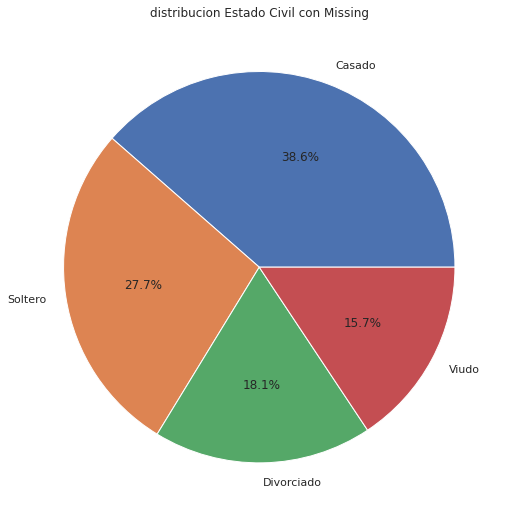

In [21]:
# Conteo seniority
estadoC_count = missing_var['estado_civil'].value_counts()

# grafico
plt.pie(estadoC_count, labels=estadoC_count.index, autopct='%1.1f%%')
plt.title('distribucion Estado Civil con Missing');

## Analisis de Valores Faltante en Performance_Score para variables numericas

### Matriz de sombra

In [22]:
(
    df
    .missing
    .bind_shadow_matrix(only_missing = True)
)

,id_colaborador,id_ultimo_jefe,seniority,modalidad_trabajo,distancia_oficina,dias_baja_salud,genero,canal_reclutamiento,permanencia_promedio,fecha_nacimiento,salario,performance_score,psi_score,fecha_incorporacion,estado_civil,id_ultimo_jefe_NA
0,100486,102115.0,1,Híbrida,0.795,2,Hombre,Ferias & Networking,2,19/01/1997,181654,99,81,24/07/2021,Soltero,Not Missing
1,103752,102074.0,1,Híbrida,1.715,1,Mujer,Ferias & Networking,1,20/08/1999,140986,97,75,27/01/2018,Soltero,Not Missing
2,103937,102150.0,1,Híbrida,2.375,1,Hombre,Portal Web,6,29/10/1984,406690,96,69,24/04/2022,Soltero,Not Missing
3,101744,102172.0,1,Híbrida,2.185,3,Hombre,Linkedin,3,9/11/1992,249107,95,73,23/05/2023,Casado,Not Missing
4,101037,102060.0,1,Híbrida,4.660,3,Hombre,Referidos,10,14/07/1969,698318,95,81,20/06/2015,Viudo,Not Missing
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015,103755,102161.0,1,Presencial,2.995,2,Mujer,Portal Web,16,23/02/1970,700814,90,69,11/11/2023,Soltero,Not Missing
2016,103976,102171.0,1,Presencial,2.775,0,Mujer,Portal Web,5,30/09/1970,677071,93,66,24/09/2023,Divorciado,Not Missing
2017,104115,102144.0,1,Presencial,3.990,1,Hombre,Portal Web,7,14/06/1970,876285,84,69,6/09/2023,Soltero,Not Missing
2018,103920,102152.0,1,Presencial,7.100,1,Mujer,Linkedin,8,30/05/1968,719102,91,75,8/11/2023,Soltero,Not Missing


### ID Ultimo Jefe vs Salario

In [23]:
# performance vs salario

print('Valores faltantes en la variable performance segun salario')
(
    df
    .missing.bind_shadow_matrix(only_missing=True) # crea la matriz de sombra
    .groupby(['id_ultimo_jefe_NA'])             # agrupar por la ausencia de la variable Peso
    ['salario']                                        # variable edad como referencia
    .describe()
    .reset_index()
)

Valores faltantes en la variable performance segun salario


,id_ultimo_jefe_NA,count,mean,std,min,25%,50%,75%,max
0,Missing,83.0,1.383262e+06,374707.891230,488000.0,1255430.0,1616000.0,1616000.0,1900000.0
1,Not Missing,1937.0,4.244259e+05,232675.586484,75517.0,263689.0,366459.0,642641.0,921943.0


<AxesSubplot:xlabel='id_ultimo_jefe_NA', ylabel='salario'>

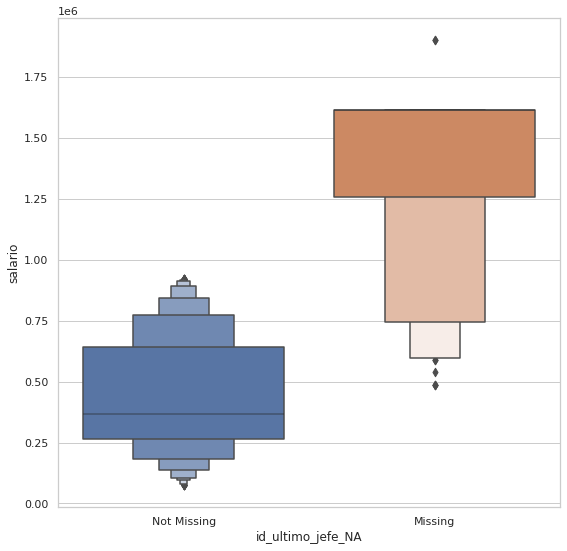

In [24]:
(
    df
    .missing
    .bind_shadow_matrix(only_missing=True) # crea la matriz de sombra
    .pipe(
        lambda df: (
            sns.boxenplot(                 # diagrama de caja
                data=df,                   # dataframe donde se encuentran las variables
                x='id_ultimo_jefe_NA',         # variable con los datos faltantes
                y='salario'                    # variable de comparacion
            )
        )   
    )
)

El salario de empleados con id_ultimo_jefe es menor que el salario de los empleados que no lo posee

### id_ultimo_jefe vs Psi Score

In [25]:
# performance vs psi_score

print('Valores faltantes en la variable performance segun el genero')
(
    df
    .missing.bind_shadow_matrix(only_missing=True) # crea la matriz de sombra
    .groupby(['id_ultimo_jefe_NA'])             # agrupar por la ausencia de la variable Peso
    ['psi_score']                                        # variable edad como referencia
    .describe()
    .reset_index()
)

Valores faltantes en la variable performance segun el genero


,id_ultimo_jefe_NA,count,mean,std,min,25%,50%,75%,max
0,Missing,83.0,75.072289,7.296479,61.0,69.0,76.0,80.0,95.0
1,Not Missing,1937.0,75.461022,5.949829,58.0,71.0,76.0,79.0,98.0


<AxesSubplot:xlabel='id_ultimo_jefe_NA', ylabel='psi_score'>

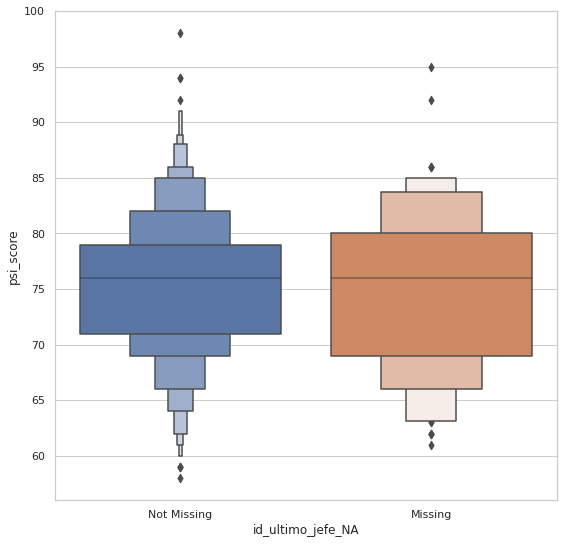

In [26]:
(
    df
    .missing
    .bind_shadow_matrix(only_missing=True) # crea la matriz de sombra
    .pipe(
        lambda df: (
            sns.boxenplot(                 # diagrama de caja
                data=df,                   # dataframe donde se encuentran las variables
                x='id_ultimo_jefe_NA',         # variable con los datos faltantes
                y='psi_score'                    # variable de comparacion
            )
        )   
    )
)

Los empleados con o sin valores faltantes en id_ultimo_jefe poseen psi_score similares por tanto la presencia de missing no influyen en el id_ultimo_jefe

### id_ultimo_jefe vs Permanencia promedio

In [27]:
# performance vs permanencia promedio

print('Valores faltantes en la id_ultimo_jefe segun permanencia promedio')
(
    df
    .missing.bind_shadow_matrix(only_missing=True) # crea la matriz de sombra
    .groupby(['id_ultimo_jefe_NA'])             # agrupar por la ausencia de la variable Peso
    ['permanencia_promedio']                                        # variable edad como referencia
    .describe()
    .reset_index()
)

Valores faltantes en la id_ultimo_jefe segun permanencia promedio


,id_ultimo_jefe_NA,count,mean,std,min,25%,50%,75%,max
0,Missing,83.0,8.385542,5.669412,1.0,4.0,6.0,11.0,27.0
1,Not Missing,1937.0,6.641714,4.226622,1.0,3.0,6.0,9.0,24.0


<AxesSubplot:xlabel='id_ultimo_jefe_NA', ylabel='permanencia_promedio'>

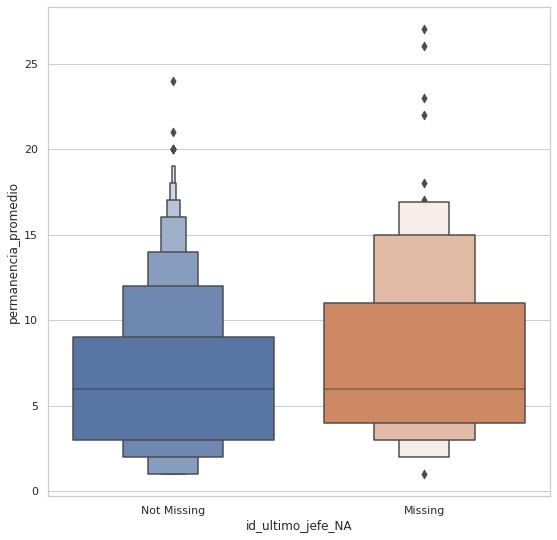

In [28]:
(
    df
    .missing
    .bind_shadow_matrix(only_missing=True) # crea la matriz de sombra
    .pipe(
        lambda df: (
            sns.boxenplot(                 # diagrama de caja
                data=df,                   # dataframe donde se encuentran las variables
                x='id_ultimo_jefe_NA',         # variable con los datos faltantes
                y='permanencia_promedio'                    # variable de comparacion
            )
        )   
    )
)

El tiempo promedio de permanencia de los empleados es similar para aquellos con y sin missing en id_ultimo_jefe

### id_ultimo_jefe score vs Distancia oficina

In [29]:
# performance vs distancia_oficina

print('Valores faltantes en la variable performance segun Distancia a la oficina')
(
    df
    .missing.bind_shadow_matrix(only_missing=True) # crea la matriz de sombra
    .groupby(['id_ultimo_jefe_NA'])             # agrupar por la ausencia de la variable Peso
    ['distancia_oficina']                                        # variable edad como referencia
    .describe()
    .reset_index()
)

Valores faltantes en la variable performance segun Distancia a la oficina


,id_ultimo_jefe_NA,count,mean,std,min,25%,50%,75%,max
0,Missing,83.0,2.957711,1.606243,0.73,1.795,2.27,3.965,7.160
1,Not Missing,1937.0,3.063751,1.638708,0.11,1.810,2.55,4.000,14.045


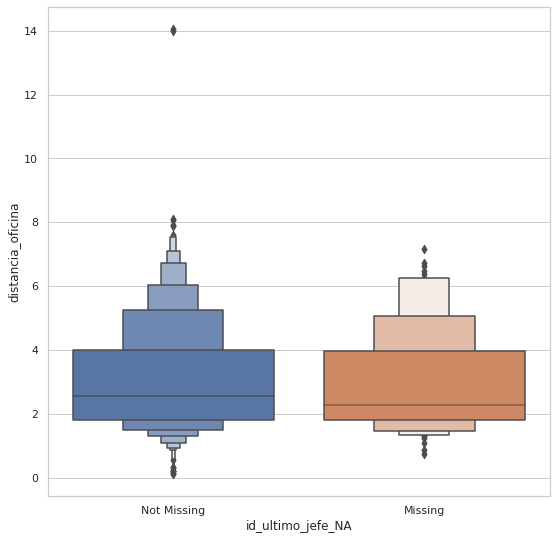

In [30]:
(
    df
    .missing
    .bind_shadow_matrix(only_missing=True) # crea la matriz de sombra
    .pipe(
        lambda df: (
            sns.boxenplot(                 # diagrama de caja
                data=df,                   # dataframe donde se encuentran las variables
                x='id_ultimo_jefe_NA',         # variable con los datos faltantes
                y='distancia_oficina'                    # variable de comparacion
            )
        )   
    )
);

El promedio de distancia a la oficina son muy similares tanto para empleados que poseen id_ultimo_jefe como los que no. Esto sugiere que la presencia de missing en id_ultimo_jefe no influye sobre la distancia a la que se encuentra la oficina

### Performance score vs Dias de bajas por salud

In [31]:
# performance vs dias de baja

print('Valores faltantes en la variable performance segun Dias de baja por salud')
(
    df
    .missing.bind_shadow_matrix(only_missing=True) # crea la matriz de sombra
    .groupby(['id_ultimo_jefe_NA'])             # agrupar por la ausencia de la variable Peso
    ['dias_baja_salud']                                        # variable edad como referencia
    .describe()
    .reset_index()
)

Valores faltantes en la variable performance segun Dias de baja por salud


,id_ultimo_jefe_NA,count,mean,std,min,25%,50%,75%,max
0,Missing,83.0,2.289157,2.998089,0.0,1.0,1.0,2.0,17.0
1,Not Missing,1937.0,2.678369,2.809060,0.0,1.0,2.0,3.0,23.0


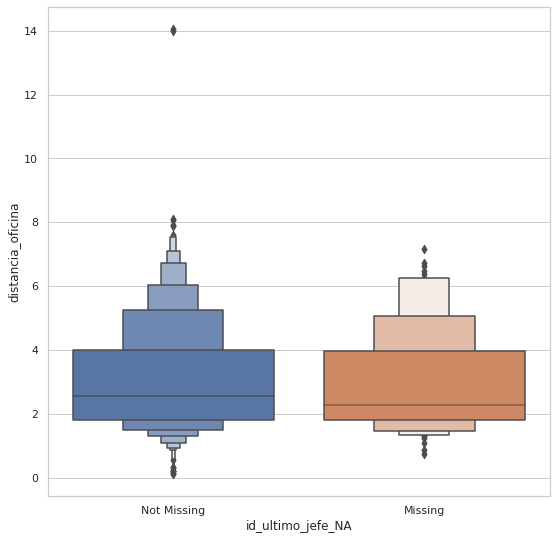

In [32]:
(
    df
    .missing
    .bind_shadow_matrix(only_missing=True) # crea la matriz de sombra
    .pipe(
        lambda df: (
            sns.boxenplot(                 # diagrama de caja
                data=df,                   # dataframe donde se encuentran las variables
                x='id_ultimo_jefe_NA',         # variable con los datos faltantes
                y='distancia_oficina'                    # variable de comparacion
            )
        )   
    )
);

El promedio de dias de baja por salud es similar para empleados con o sin id_ultimo_jefe por tanto la presencia de missing no influyen en los dias de baja por salud

## Imputacion de valores faltantes

In [33]:
df

,id_colaborador,id_ultimo_jefe,seniority,modalidad_trabajo,distancia_oficina,dias_baja_salud,genero,canal_reclutamiento,permanencia_promedio,fecha_nacimiento,salario,performance_score,psi_score,fecha_incorporacion,estado_civil
0,100486,102115.0,1,Híbrida,0.795,2,Hombre,Ferias & Networking,2,19/01/1997,181654,99,81,24/07/2021,Soltero
1,103752,102074.0,1,Híbrida,1.715,1,Mujer,Ferias & Networking,1,20/08/1999,140986,97,75,27/01/2018,Soltero
2,103937,102150.0,1,Híbrida,2.375,1,Hombre,Portal Web,6,29/10/1984,406690,96,69,24/04/2022,Soltero
3,101744,102172.0,1,Híbrida,2.185,3,Hombre,Linkedin,3,9/11/1992,249107,95,73,23/05/2023,Casado
4,101037,102060.0,1,Híbrida,4.660,3,Hombre,Referidos,10,14/07/1969,698318,95,81,20/06/2015,Viudo
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015,103755,102161.0,1,Presencial,2.995,2,Mujer,Portal Web,16,23/02/1970,700814,90,69,11/11/2023,Soltero
2016,103976,102171.0,1,Presencial,2.775,0,Mujer,Portal Web,5,30/09/1970,677071,93,66,24/09/2023,Divorciado
2017,104115,102144.0,1,Presencial,3.990,1,Hombre,Portal Web,7,14/06/1970,876285,84,69,6/09/2023,Soltero
2018,103920,102152.0,1,Presencial,7.100,1,Mujer,Linkedin,8,30/05/1968,719102,91,75,8/11/2023,Soltero


In [34]:
import janitor  # limpiar datos

In [35]:
df_jefe = (
    df
    .select_columns('id_ultimo_jefe')
    .fillna(method='ffill')
)

In [36]:
df_jefe

,id_ultimo_jefe
0,102115.0
1,102074.0
2,102150.0
3,102172.0
4,102060.0
...,...
2015,102161.0
2016,102171.0
2017,102144.0
2018,102152.0


In [37]:
df['id_ultimo_jefe'] = df_jefe['id_ultimo_jefe']

In [38]:
df.isnull().sum()

id_colaborador          0
id_ultimo_jefe          0
seniority               0
modalidad_trabajo       0
distancia_oficina       0
dias_baja_salud         0
genero                  0
canal_reclutamiento     0
permanencia_promedio    0
fecha_nacimiento        0
salario                 0
performance_score       0
psi_score               0
fecha_incorporacion     0
estado_civil            0
dtype: int64

In [39]:
df.shape

(2020, 15)

In [40]:
# exportar datos preparados
#df.to_csv('test_data_preparado.csv', index=False)